#### Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Carregando os dados


In [2]:
df_relatorio_vendas = (
    pd.read_csv('./dataset/relatorio_vendas_etapa_4.csv', sep=';')
)


### Análise exploratória do relatório de vendas


#### **`Estudo sobre o preço`**


 *`VL_TAG_PRICE`*


<AxesSubplot:xlabel='VL_TAG_PRICE'>

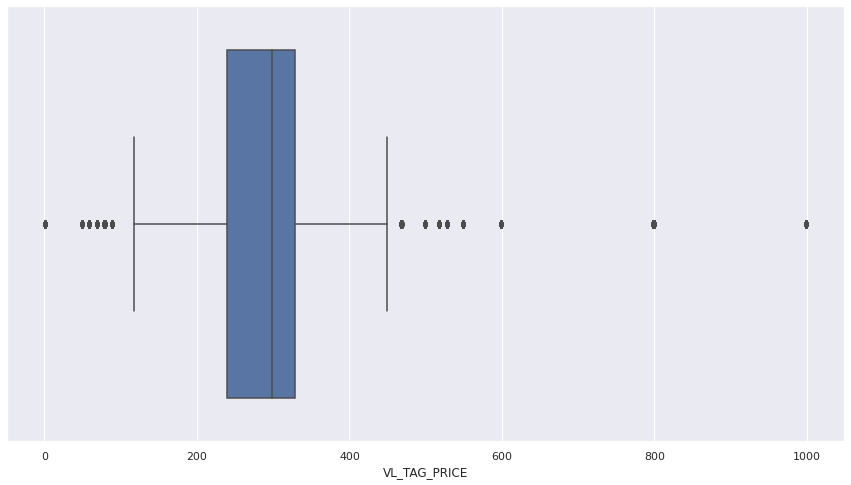

In [38]:
# Construindo o boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_relatorio_vendas['VL_TAG_PRICE'])


In [39]:
# Análise quantitativa do boxplot
df_relatorio_vendas['VL_TAG_PRICE'].describe()


count    317237.000000
mean        296.291259
std          74.818513
min           1.000000
25%         239.000000
50%         299.000000
75%         329.000000
max         999.000000
Name: VL_TAG_PRICE, dtype: float64

<AxesSubplot:xlabel='VL_TAG_PRICE', ylabel='Count'>

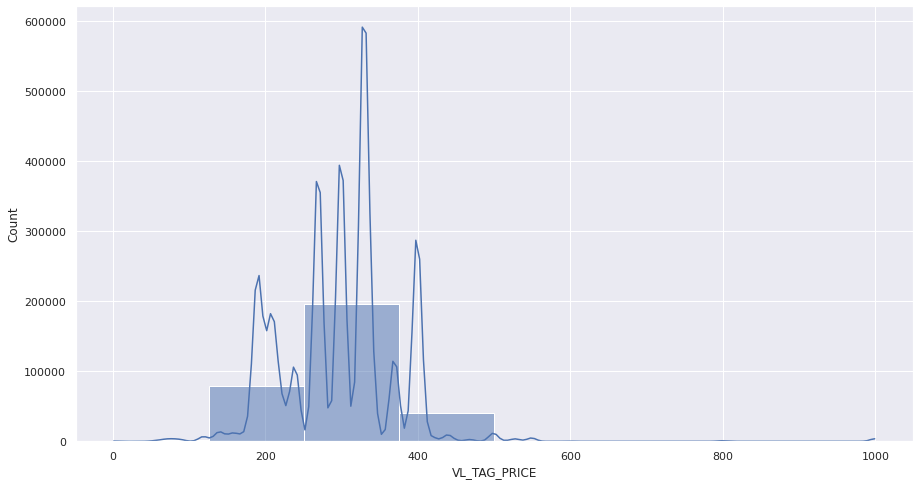

In [40]:
# Curva de densidade e distribuição dos dados
plt.figure(figsize=(15, 8))
sns.histplot(
    data=df_relatorio_vendas
    , x="VL_TAG_PRICE"
    , bins=8
    , kde=True
)


<AxesSubplot:xlabel='VL_TAG_PRICE', ylabel='Count'>

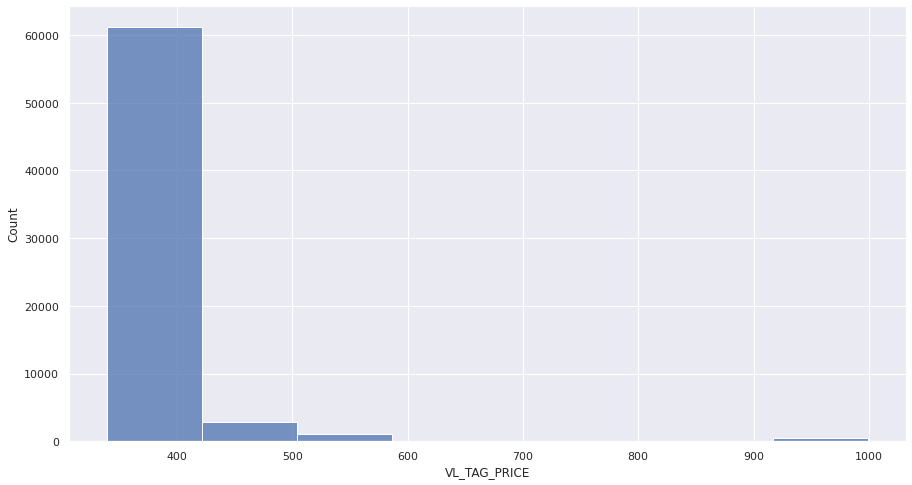

In [41]:
# tag_price distribution over 75% percentile
hist_plot = (
    df_relatorio_vendas[
            (df_relatorio_vendas['VL_TAG_PRICE'] > 329)
        & (df_relatorio_vendas['VL_TAG_PRICE'] < 1000)
    ]
)

plt.figure(figsize=(15, 8))
sns.histplot(data=hist_plot, x="VL_TAG_PRICE", bins=8)


##### `VL_FULL_PRICE`


<AxesSubplot:xlabel='VL_FULL_PRICE'>

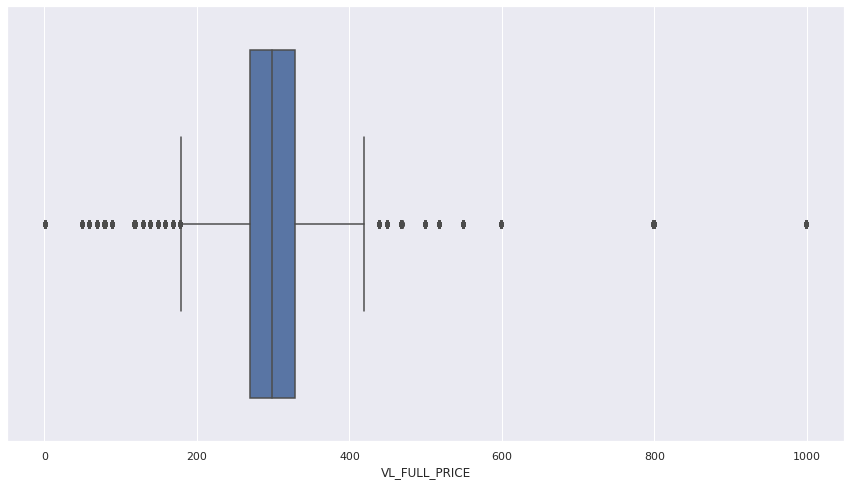

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_relatorio_vendas['VL_FULL_PRICE'])


<AxesSubplot:xlabel='VL_FULL_PRICE', ylabel='Count'>

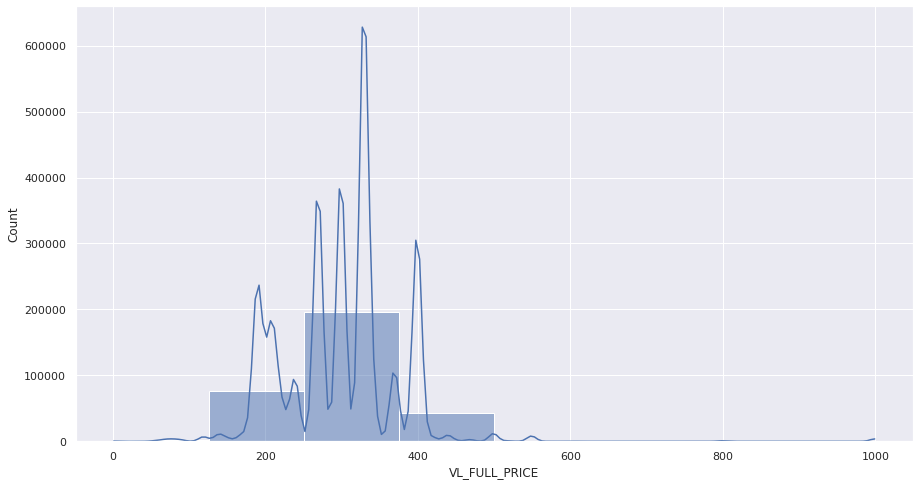

In [43]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_relatorio_vendas, x="VL_FULL_PRICE", bins=8, kde=True)


*`VL_DISCOUNT_PRICE_A1`*


<AxesSubplot:xlabel='VL_DISCOUNT_PRICE_A1'>

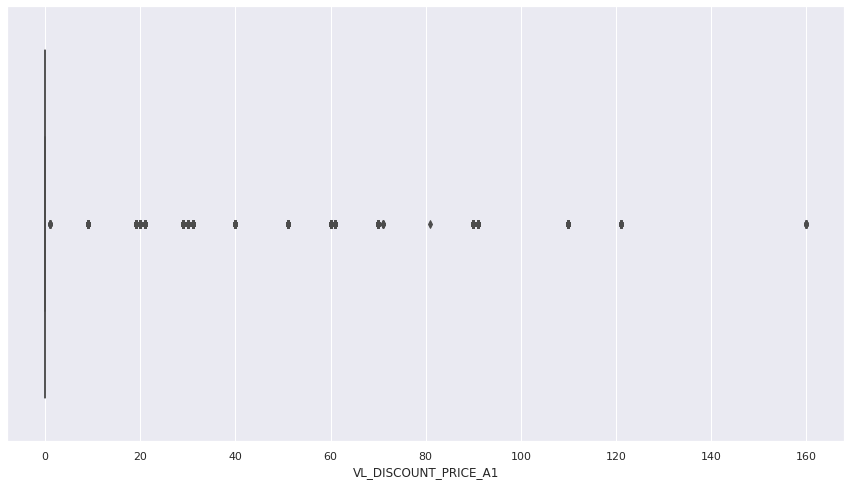

In [44]:
# Construindo o boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_relatorio_vendas['VL_DISCOUNT_PRICE_A1'])


In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_relatorio_vendas['VL_DISCOUNT_PRICE_A1'])

df_relatorio_vendas['VL_DISCOUNT_PRICE_A1'].describe()

In [45]:
# Análise quantitativa do boxplot
df_relatorio_vendas['VL_DISCOUNT_PRICE_A1'].describe()


count    317237.000000
mean          1.683152
std           9.619397
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         160.000000
Name: VL_DISCOUNT_PRICE_A1, dtype: float64

<AxesSubplot:xlabel='VL_DISCOUNT_PRICE_A1', ylabel='Count'>

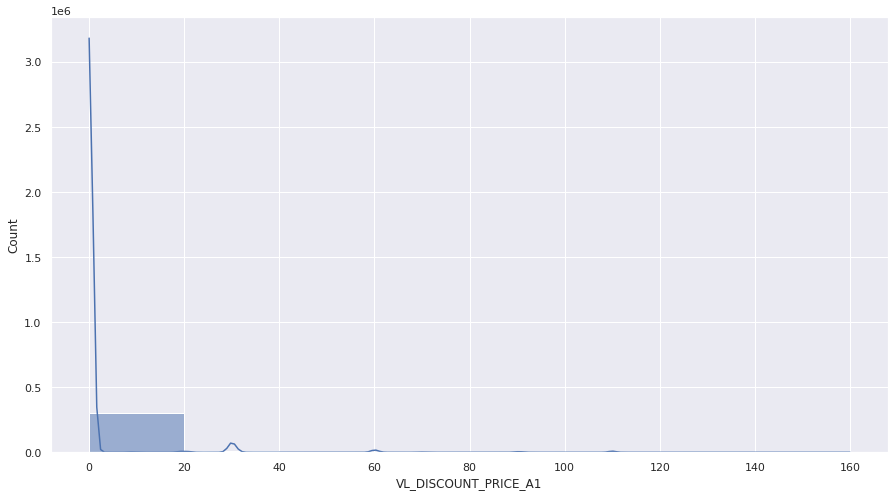

In [46]:
# Curva de densidade e distribuição dos dados
plt.figure(figsize=(15, 8))
sns.histplot(
    data=df_relatorio_vendas
    ,x='VL_DISCOUNT_PRICE_A1'
    , bins=8
    , kde=True
)


*`VL_DISCOUNT_PRICE_A2`*


<AxesSubplot:xlabel='VL_DISCOUNT_PRICE_A2'>

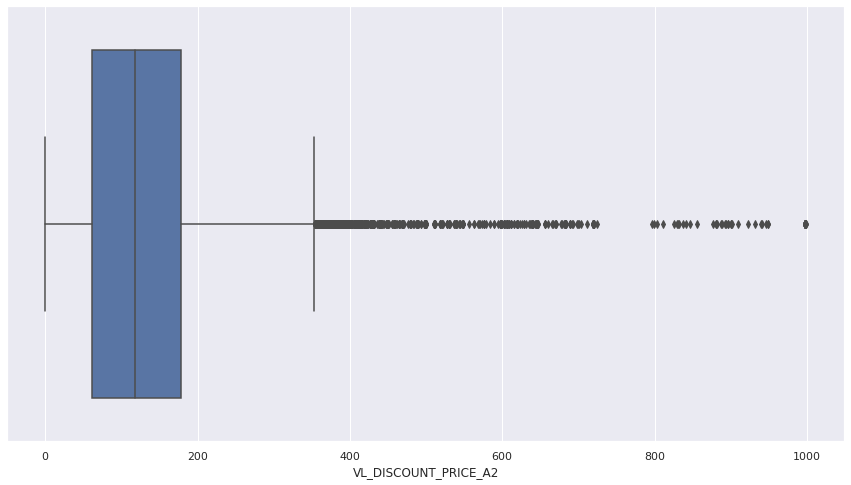

In [47]:
# Construindo o boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x=df_relatorio_vendas['VL_DISCOUNT_PRICE_A2'])


In [48]:
# Análise quantitativa do boxplot
df_relatorio_vendas['VL_DISCOUNT_PRICE_A2'].describe()


count    317237.000000
mean        124.274864
std          78.862405
min           0.000000
25%          61.000000
50%         118.000000
75%         178.000000
max         999.000000
Name: VL_DISCOUNT_PRICE_A2, dtype: float64

<AxesSubplot:xlabel='VL_DISCOUNT_PRICE_A2', ylabel='Count'>

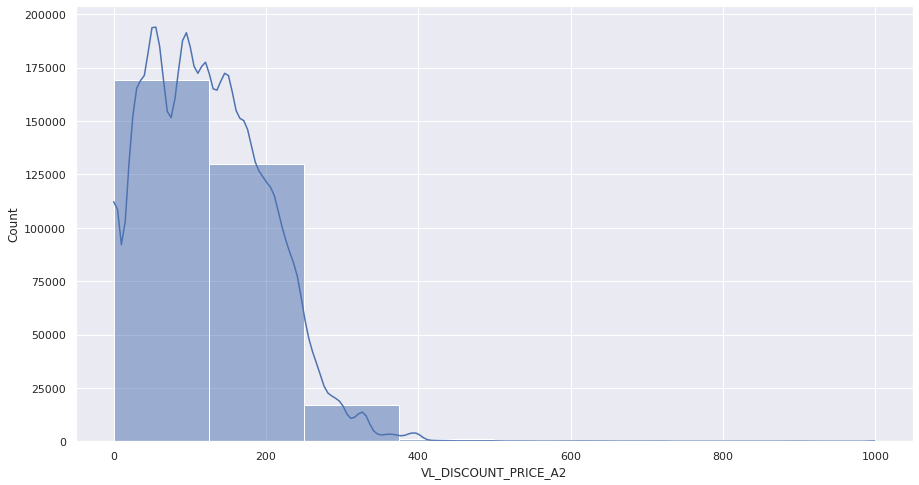

In [49]:
# Curva de densidade e distribuição dos dados
plt.figure(figsize=(15, 8))
sns.histplot(data=df_relatorio_vendas,
             x='VL_DISCOUNT_PRICE_A2', bins=8, kde=True)


#### **`Estudo sobre a Demanda`**


##### Quantas vendas foram feitas em dias de feriado e em dias normais? 


In [ ]:
# Construção do gráfico
plt.figure(figsize=(10, 8))

# Montando um countplot com o seaborn
chart = sns.countplot(x='IN_IS_HOLIDAY', data=df_relatorio_vendas)
chart.bar_label(chart.containers[0])
chart.set_xlabel(None)
chart.set_ylabel('Total Orders', fontsize='large', fontweight='bold')
# Mudando o nome dos elementos
chart.set_xticklabels(['COMMON_DAY', 'HOLIDAY'])

plt.yticks([])
plt.show()



##### Dentro destas vendas, qual foi a quantidade de pares vendidos?


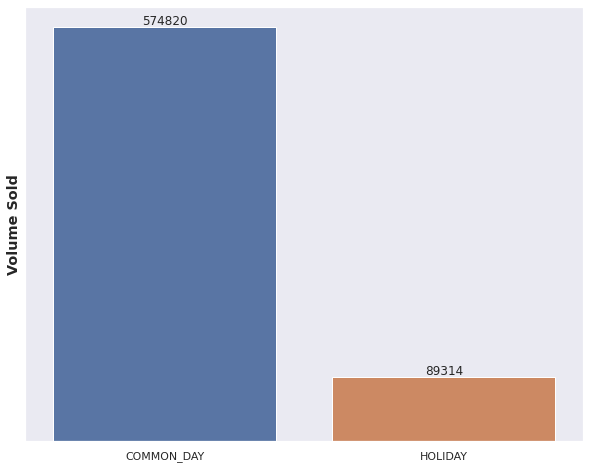

In [58]:
# Construção do gráfico
plt.figure(figsize=(10, 8))

# Montando um barplot com o seaborn
chart = sns.barplot(
    x='IN_IS_HOLIDAY'
    , y='QT_SOLD'
    , data=df_relatorio_vendas
    , estimator=sum
    , ci=None
)

chart.bar_label(chart.containers[0])
chart.set_xlabel(None)
chart.set_ylabel('Volume Sold', fontsize='large', fontweight='bold')
# Mudando o nome dos elementos
chart.set_xticklabels(['COMMON_DAY', 'HOLIDAY'])

plt.yticks([])
plt.show()



##### Qual foi a performance de vendas em dias comuns e em feriados? 


In [ ]:
# Criando um novo dataframe para performance
df_performance = (
    df_relatorio_vendas
        .groupby(['DT_ORDER_DATE'])
        .agg(
            QT_NON_HOLIDAY = (
                'IN_IS_HOLIDAY'
                , lambda x: (x == 0).sum()
            )
            , QT_HOLIDAY = (
                'IN_IS_HOLIDAY'
                , lambda x: (x == 1).sum()
            )
        )
        .reset_index()
)

performance_dias_comuns = (
    df_performance['QT_NON_HOLIDAY'].sum() 
    / df_performance[df_performance['QT_NON_HOLIDAY'] != 0]['QT_NON_HOLIDAY'].count()
)

performance_feriados = (
    df_performance['QT_HOLIDAY'].sum() 
    / df_performance[df_performance['QT_HOLIDAY'] != 0]['QT_HOLIDAY'].count()
)

print(f"""
    Performance em dias comuns: {performance_dias_comuns}
    Performance em feriados: {performance_feriados}
    """)


##### Qual é o impacto do verão do hemisfério norte no volume de vendas do e-commerce?


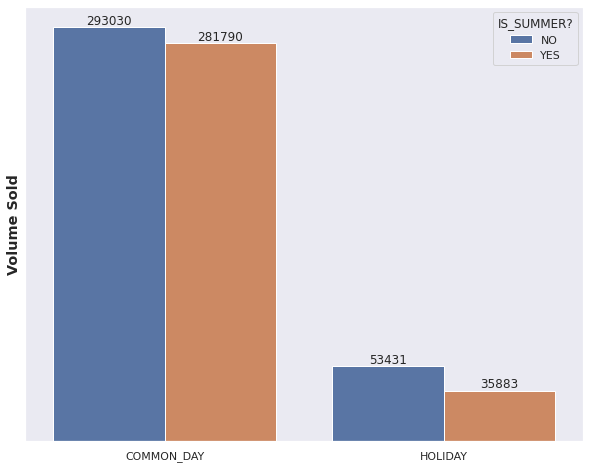

In [59]:
# Construção do gráfico
plt.figure(figsize=(10, 8))

# Montando um barplot com o seaborn
chart = sns.barplot(
    x='IN_IS_HOLIDAY'
    , y='QT_SOLD'
    , hue='IN_IS_SUMMER'
    , data=df_relatorio_vendas
    , estimator=sum
    , ci=None
)

chart.set_xlabel(None)
chart.set_ylabel('Volume Sold', fontsize='large', fontweight='bold')
# Mudando o nome dos elementos
chart.set_xticklabels(['COMMON_DAY', 'HOLIDAY'])
# Criando uma legenda para o gráfico
chart.legend(labels=['NO', 'YES'], title='IS_SUMMER?')

for container in chart.containers:
    chart.bar_label(container)

plt.yticks([])
plt.show()

##### Quantas vendas foram realizadas em cada feriado do relatório?


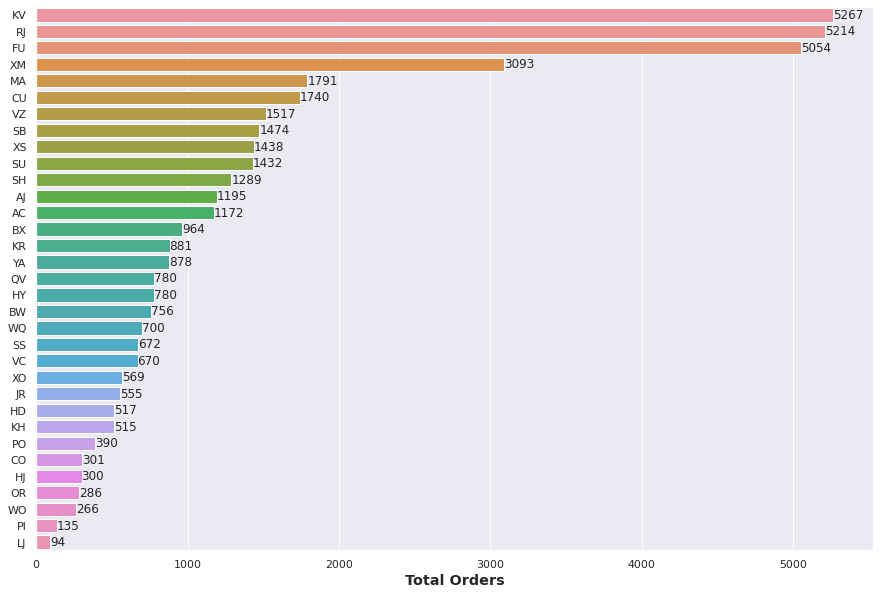

In [60]:
# Construção do gráfico
plt.figure(figsize=(15, 10))

df_chart = df_relatorio_vendas[df_relatorio_vendas['IN_IS_HOLIDAY'] == 1]

# Montando um countplot com o seaborn
chart = sns.countplot(
    y='DS_HOLIDAY_NAME', order=(
        df_chart['DS_HOLIDAY_NAME']
        .value_counts()
        .index
    ), data=df_chart, orient='h'
)
chart.bar_label(chart.containers[0])
chart.set_ylabel(None)
chart.set_xlabel('Total Orders', fontsize='large', fontweight='bold')

plt.show()

##### E quanto à quantidade de produto vendido por feriado?


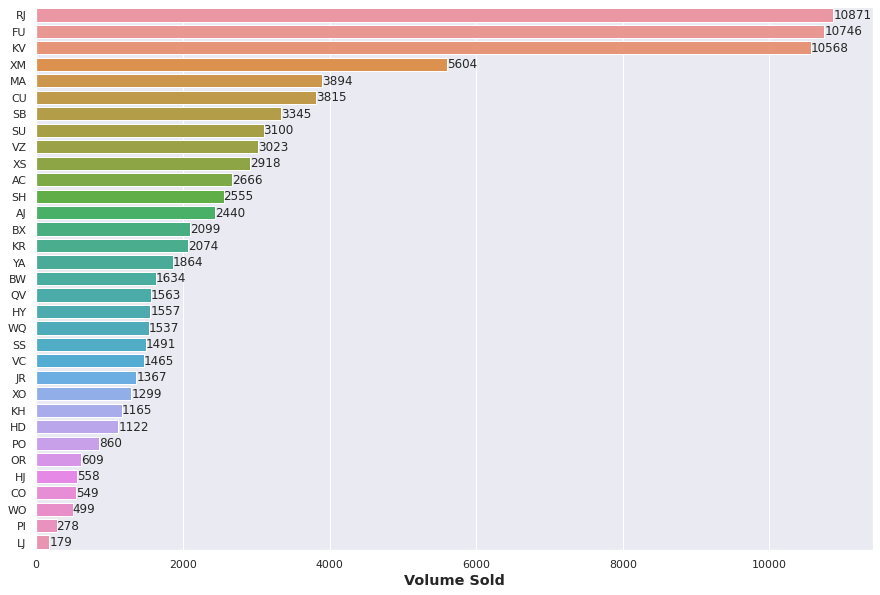

In [61]:
# Construção do gráfico
plt.figure(figsize=(15, 10))

df_chart = df_relatorio_vendas[df_relatorio_vendas['IN_IS_HOLIDAY'] == 1]

# Montando um barplot com o seaborn
chart = sns.barplot(
    y='DS_HOLIDAY_NAME', x='QT_SOLD', order=(
        df_chart
        .groupby(['DS_HOLIDAY_NAME'])['QT_SOLD']
        .sum()
        .sort_values(ascending=False)
        .index
    ), data=df_chart, estimator=sum, orient='h', ci=None
)
chart.bar_label(chart.containers[0])
chart.set_ylabel(None)
chart.set_xlabel('Volume Sold', fontsize='large', fontweight='bold')

plt.show()


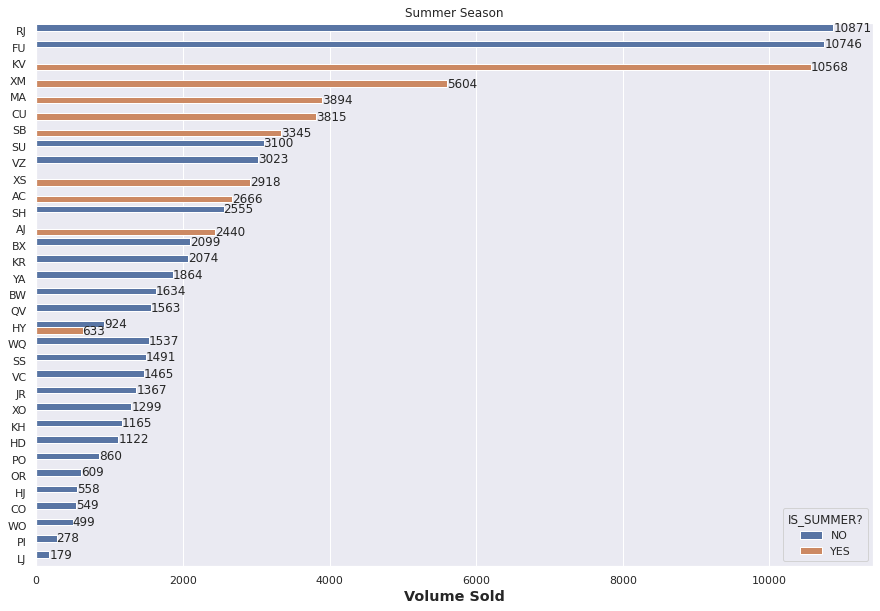

In [62]:
plt.figure(figsize=(15, 10))

df_chart = df_relatorio_vendas[(df_relatorio_vendas['IN_IS_HOLIDAY'] == 1)]

chart = sns.barplot(
    y='DS_HOLIDAY_NAME', x='QT_SOLD', hue='IN_IS_SUMMER', order=(
        df_chart
        .groupby(['DS_HOLIDAY_NAME'])['QT_SOLD']
        .sum()
        .sort_values(ascending=False)
        .index
    ), data=df_chart, estimator=sum, orient='h', ci=None, dodge=True
)

chart.set_title('Summer Season')
chart.set_ylabel(None)
chart.set_xlabel('Volume Sold', fontsize='large', fontweight='bold')
chart.legend(labels=['NO', 'YES'], title='IS_SUMMER?')

for container in chart.containers:
    chart.bar_label(container)

plt.show()


#### **`Estudo da relação entre o preço e a demanda`**


##### Preparando o dataframe


In [63]:
df_sales_product_color = (
    df_relatorio_vendas
    .groupby(
        [
            'DT_ORDER_DATE',
            'CD_PRODUCT_COLOR',
            'DS_HOLIDAY_NAME',
            'IN_IS_SUMMER',
        ]
    )
    .agg(
        QT_TOTAL_SOLD=(
            'QT_SOLD', 'sum'
        ),
        QT_MEAN_SOLD=(
            'QT_SOLD', 'mean'
        ), VL_MEAN_PRICE=(
            'VL_TAG_PRICE', 'mean'
        ), VL_MEAN_DISCOUNT_PRICE_A1=(
            'VL_DISCOUNT_PRICE_A1', 'mean'
        ), VL_MEAN_DISCOUNT_PRICE_A2=(
            'VL_DISCOUNT_PRICE_A2', 'mean'
        )
    )
    .reset_index()
    .sort_values('QT_TOTAL_SOLD', ascending=False)
)


##### Buscando pelos 25 campeões de vendas


In [64]:
top_25_products = (
    df_sales_product_color
    .groupby('CD_PRODUCT_COLOR')
    .agg(
        VL_TOTAL_SOLD=(
            'QT_TOTAL_SOLD', 'sum'
        )
    )
    .sort_values('VL_TOTAL_SOLD', ascending=False)
    .head(25)
    .index
)

# Top 25 produtos
df_sales_top_25 = (
    df_sales_product_color[
        df_sales_product_color['CD_PRODUCT_COLOR']
        .isin(top_25_products)
    ]
    .sort_values(
        'QT_TOTAL_SOLD', ascending=False
    )
    .reset_index(drop=True)
)


##### Scatterplot VL_TAG_PRICE X QT_SOLD


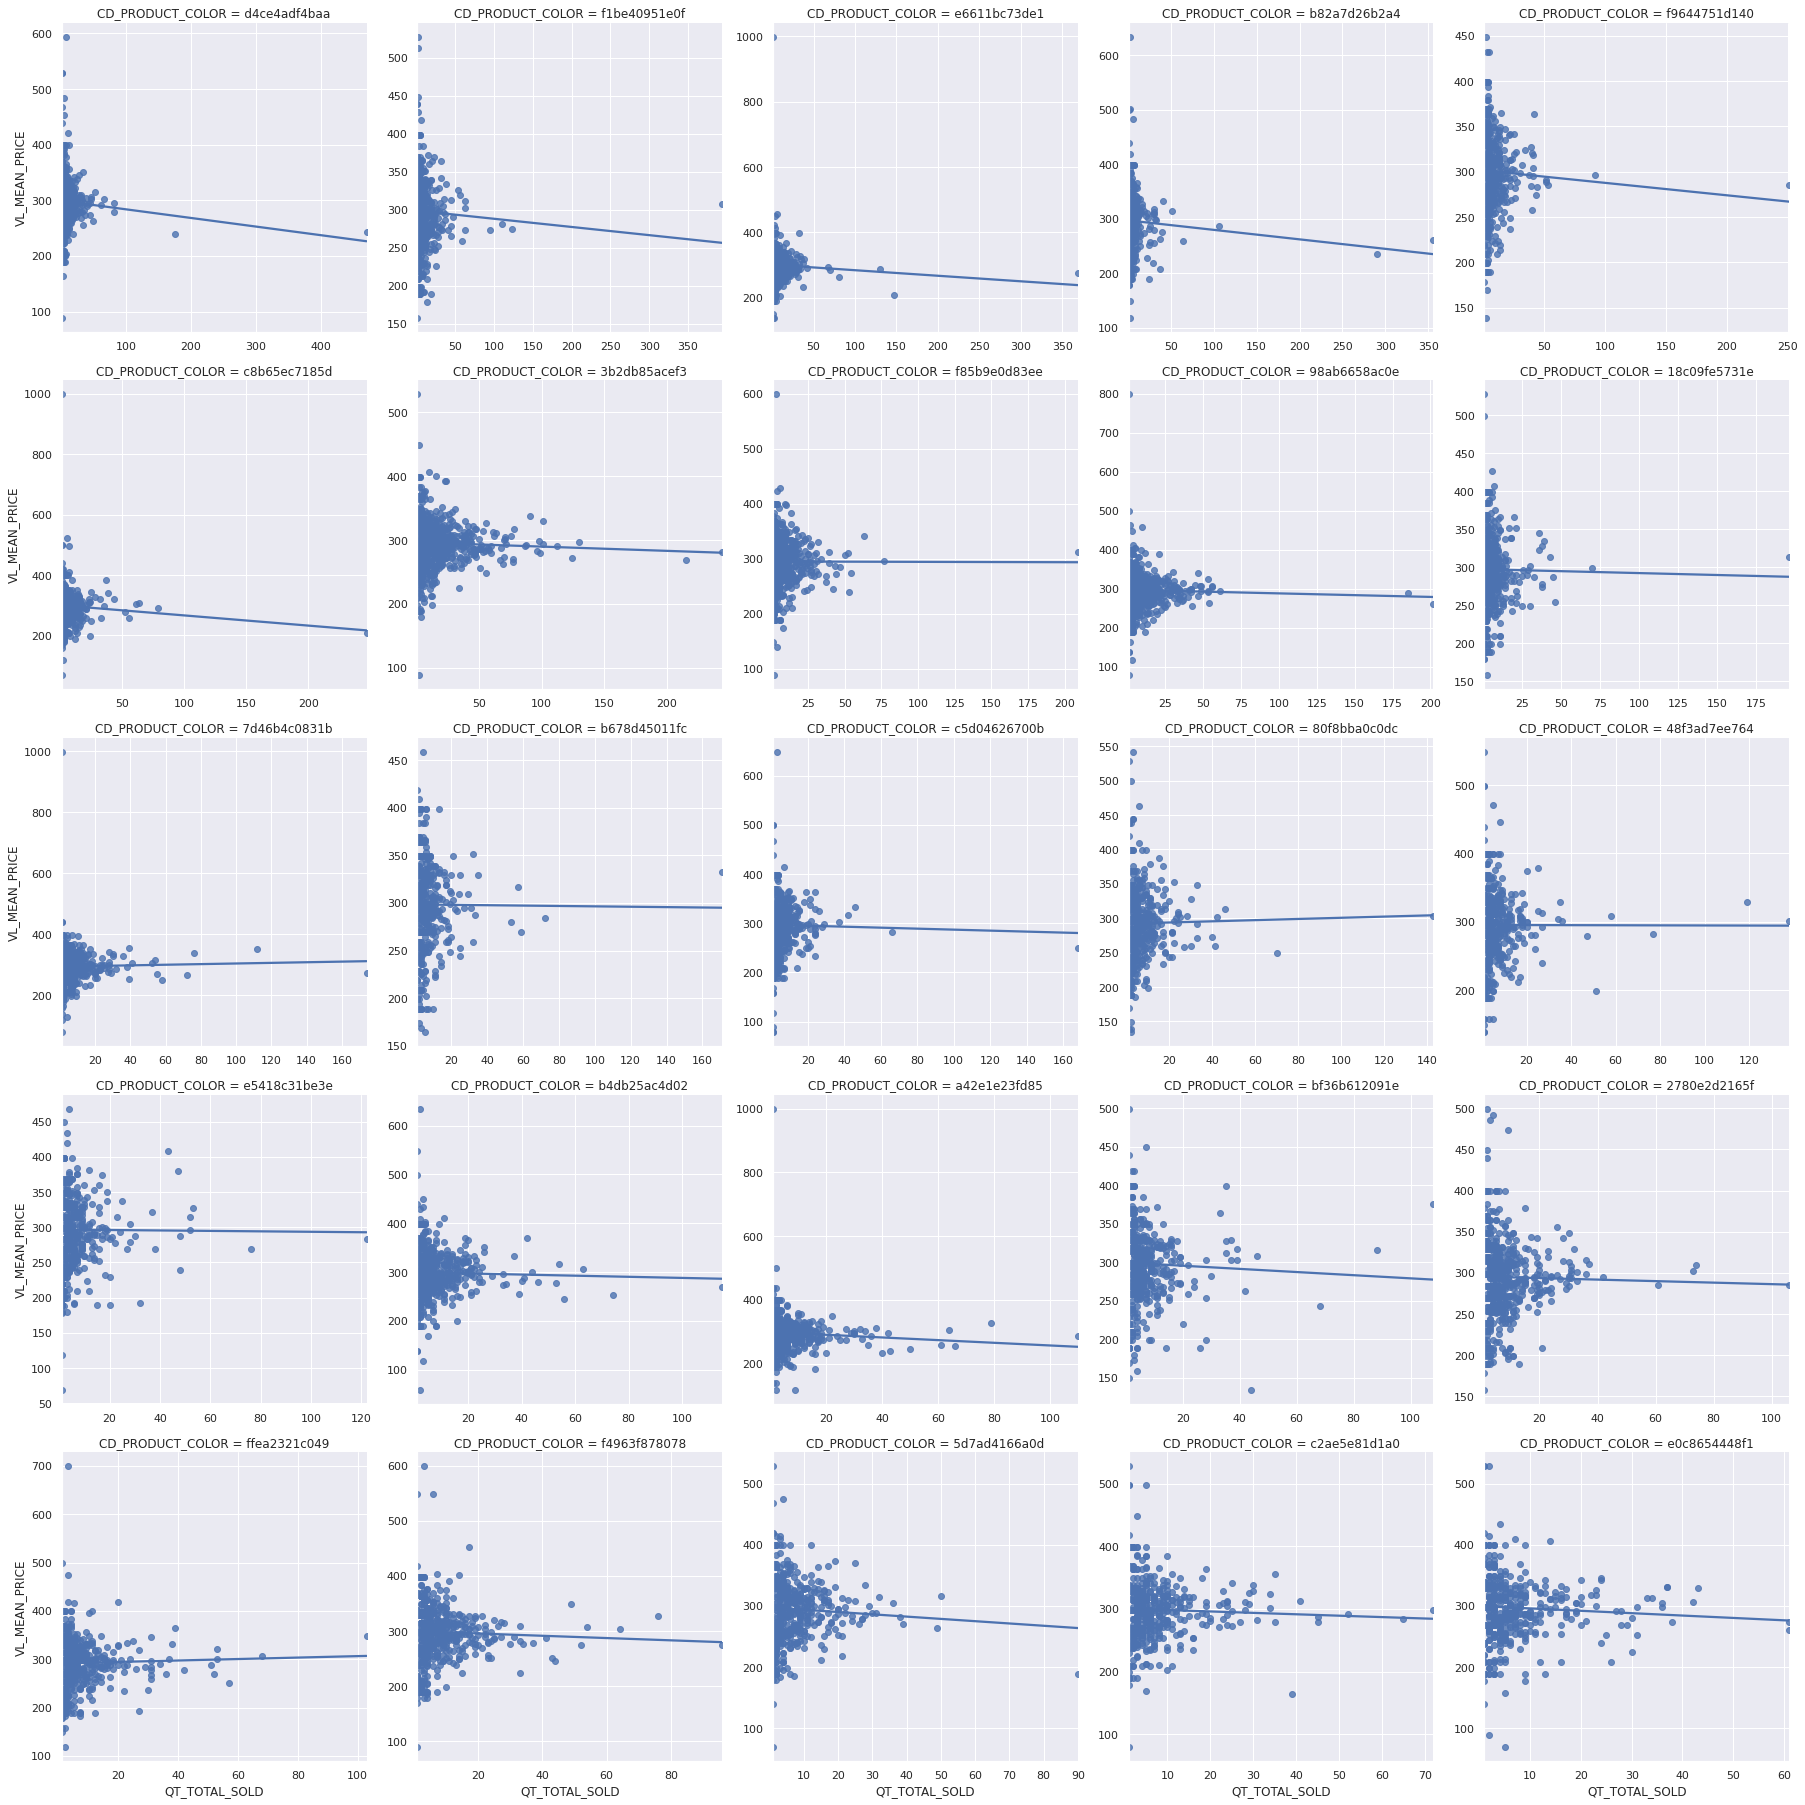

In [66]:
sns.set(style="darkgrid")
chart_scatter = sns.lmplot(
    x='QT_TOTAL_SOLD',
    y='VL_MEAN_PRICE',
    col='CD_PRODUCT_COLOR',
    data=df_sales_top_25,
    col_wrap=5,
    sharey=False,
    sharex=False,
    ci=None
)


##### Scatterplot VL_DISCOUNT_PRICE_A1 X QT_SOLD


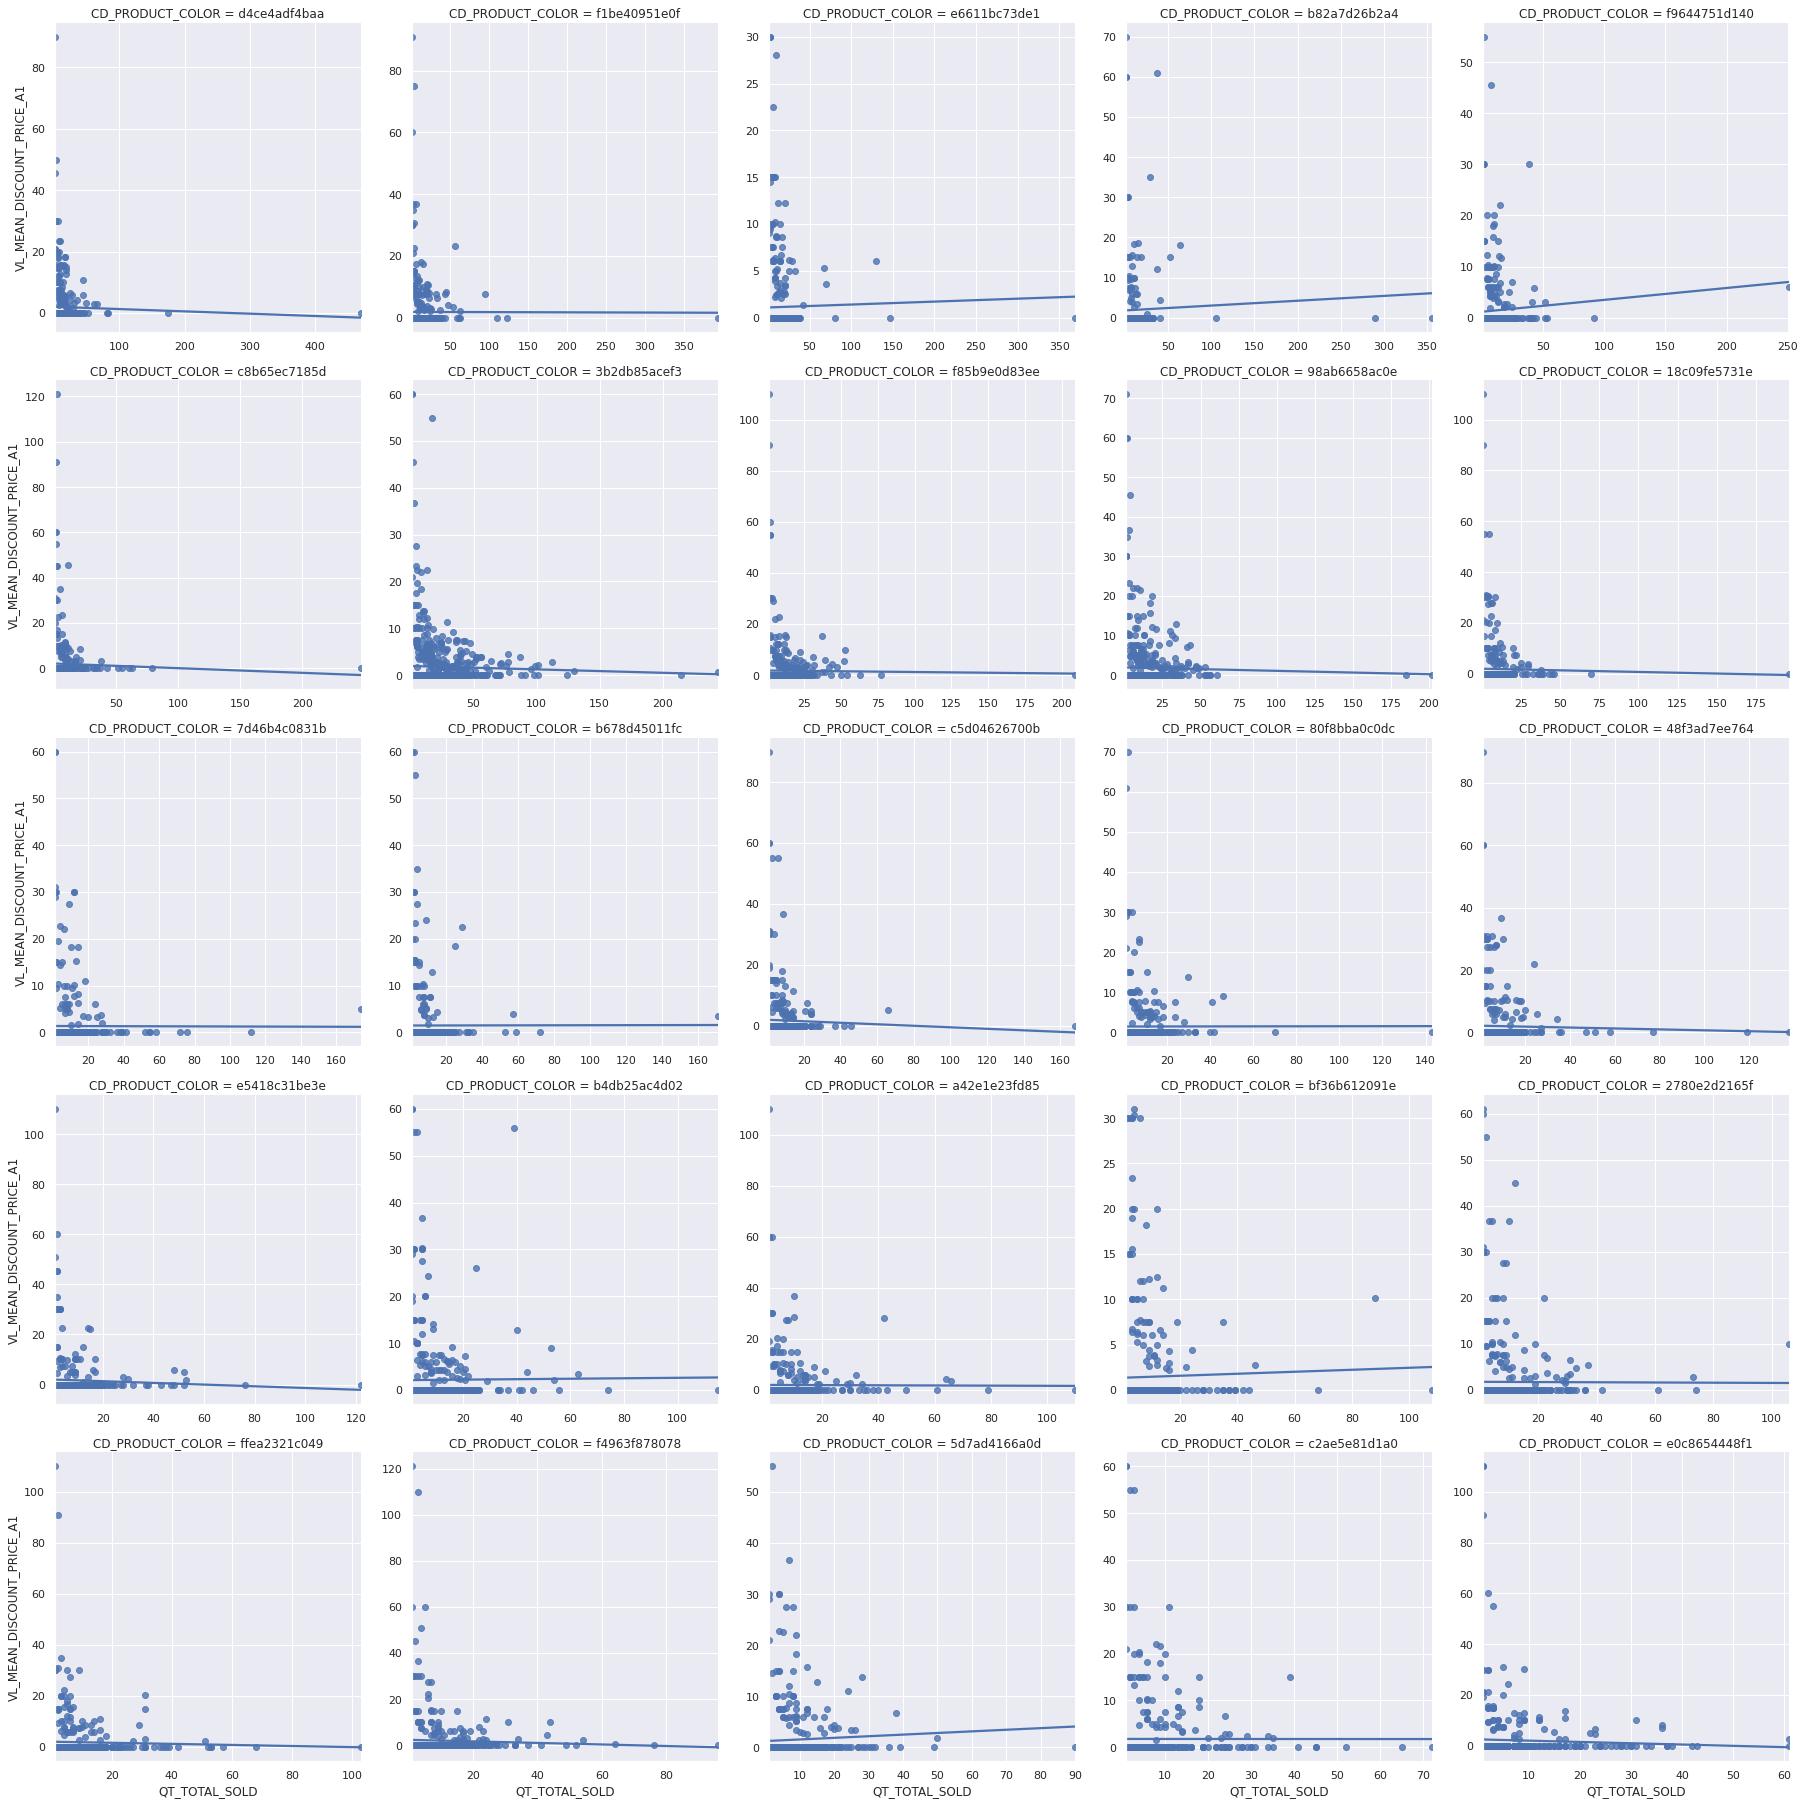

In [67]:
sns.set(style="darkgrid")
chart_scatter = sns.lmplot(
    x='QT_TOTAL_SOLD',
    y='VL_MEAN_DISCOUNT_PRICE_A1',
    col='CD_PRODUCT_COLOR',
    data=df_sales_top_25,
    col_wrap=5,
    sharey=False,
    sharex=False,
    ci=None
)


##### Scatterplot VL_DISCOUNT_PRICE_A2 X QT_SOLD


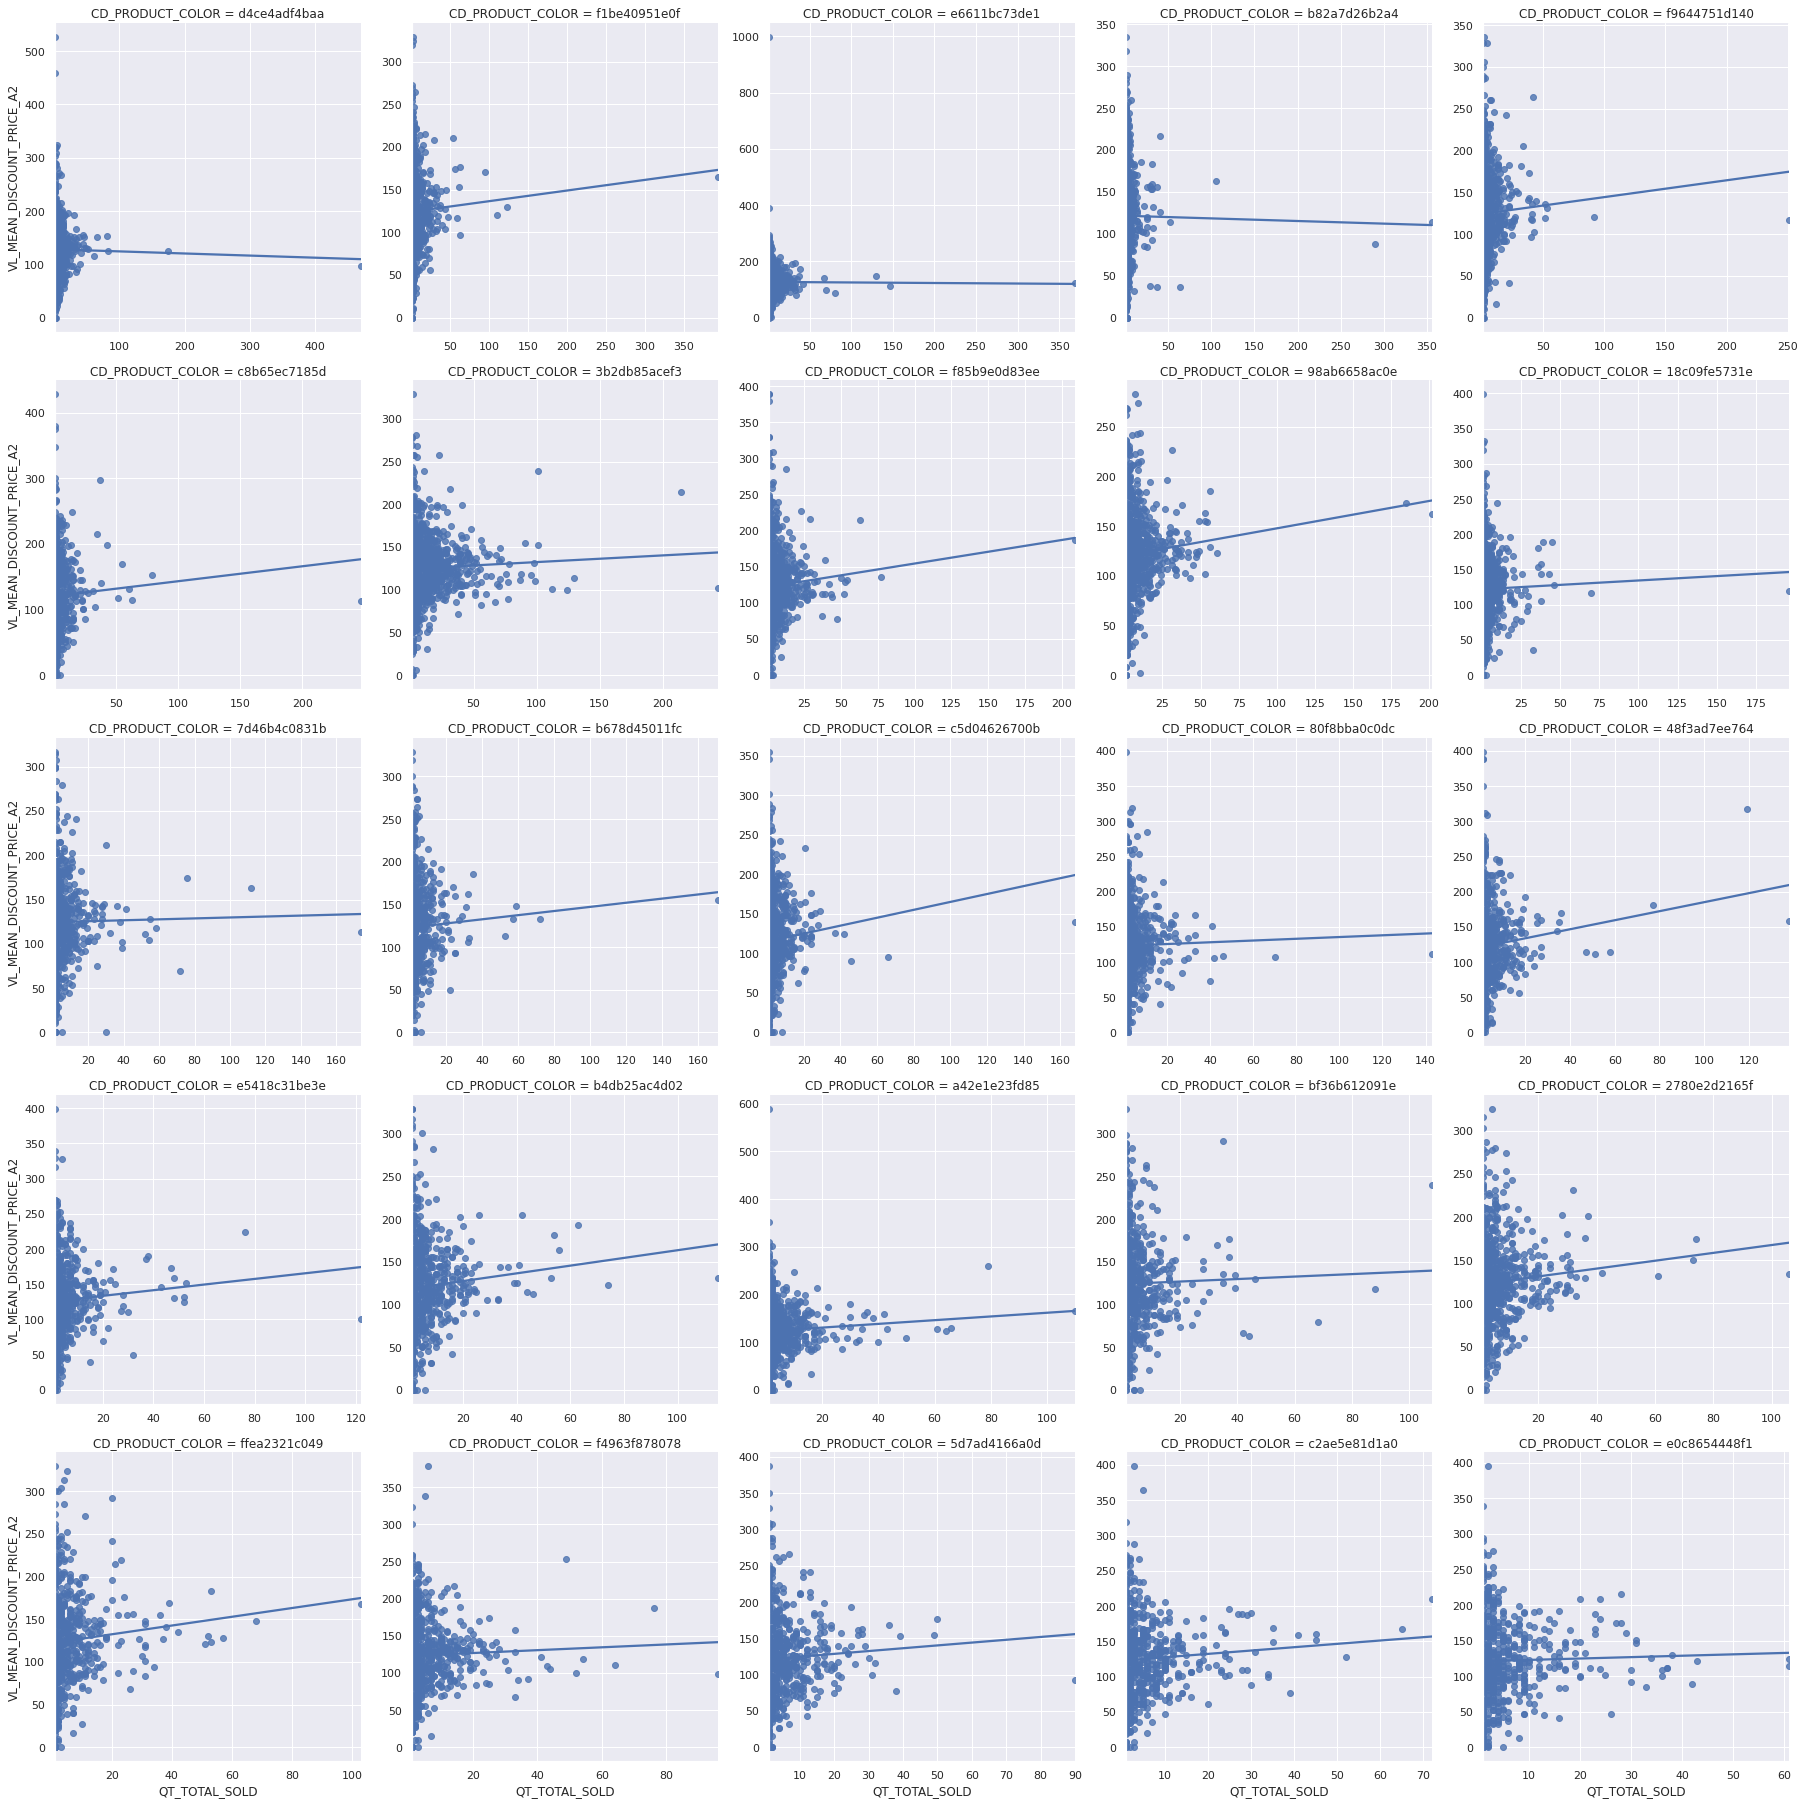

In [68]:
sns.set(style="darkgrid")
chart_scatter = sns.lmplot(
    x='QT_TOTAL_SOLD',
    y='VL_MEAN_DISCOUNT_PRICE_A2',
    col='CD_PRODUCT_COLOR',
    data=df_sales_top_25,
    col_wrap=5,
    sharey=False,
    sharex=False,
    ci=None
)


#### **`Estudo do intervalo ideal para modelagem`**


#### Analisando variações diárias de preço


In [ ]:

# Checando por variações diárias
df_price_variation = (
    df_relatorio_vendas
    .groupby(
        [
            'DT_ORDER_DATE', 'CD_PRODUCT_COLOR'
        ]
    )
    .agg(
        QT_ORDER_AMOUNT=('VL_TAG_PRICE', 'count')
        ,VL_MIN=('VL_TAG_PRICE', 'min')
        ,VL_MEAN=('VL_TAG_PRICE', 'mean')
        ,VL_MAX=('VL_TAG_PRICE', 'max')
        ,VL_DAILY_VARIATION=(
            'VL_TAG_PRICE', lambda x: max(x) - min(x)
        )
        ,VL_PRICES=(
            'VL_TAG_PRICE', 'unique')
    )
    .reset_index()
)

# Mostrando os produtos que possuiram variação
(df_price_variation[
    (df_price_variation['VL_DAILY_VARIATION'] != 0.0)
].sort_values('DT_ORDER_DATE')
)


#### Analisando as quantidades vendidas mensalmente

In [ ]:

# Criando uma coluna de mês dentro do dataframe

df_relatorio_vendas['DT_ORDER_MONTH'] = (
    pd.to_datetime(df_relatorio_vendas['DT_ORDER_DATE'])
    .dt.to_period('M')
)

# Mostrando o resultado
(
    df_relatorio_vendas
    .groupby(
        [
            'DT_ORDER_MONTH', 'CD_PRODUCT_COLOR'
        ]
    )
    .agg(
        QT_ORDER_MONTH=('DT_ORDER_DATE', 'nunique')
        , DT_MIN_ORDER_DATE=('DT_ORDER_DATE', 'min')
        , DT_MAX_ORDER_DATE=('DT_ORDER_DATE', 'max')
        , QT_SOLD_AMOUNT=('QT_SOLD', 'sum')
    )
    .reset_index()
).sort_values(['CD_PRODUCT_COLOR', 'DT_ORDER_MONTH'])


#### Exportando o dataframe devidamente organizado para ser utilizado no próximo notebook

In [70]:
# Removendo coluna desnecessária para modelagem
(
    df_relatorio_vendas
    .drop(
        'DS_HOLIDAY_NAME', axis=1, inplace=True
    )
)

(
    df_relatorio_vendas
    .drop(
        'DT_ORDER_MONTH'
        , axis=1
        , inplace=True
    )
)

(
    df_relatorio_vendas
    .to_csv(
        './dataset/relatorio_vendas_etapa_5.csv'
        ,header=True
        , sep=";"
        , index=False
        , encoding="utf-8"
    )
)
